In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import numpy as np
import pandas as pd
from statistics import mean
from random import choice
%matplotlib inline
import matplotlib.pyplot as plt

from gendis.genetic import GeneticExtractor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from tools.data_extraction import DataExtractor
from tools.trajectory_generator import TrajectoryGenerator
from tools.utils import standardize_data, print_genetic_param, print_settings, set_movements, angle_diff,scale_down, get_distance
from tools.experiments import Experiments

np.random.seed(1337)  # Random seed for reproducibility

tr_gen_options = {"samples": 25,
                  "freq": 3,
                  "reset_data": True}
dt_gen_options = {"n_test": 150}

train_test_options = {"split": 25}

df_csv_options = {"ts_class": "Bearing"}

gen_options = {"population_size": 20,
               "iterations": 20,
               "verbose": True,
               "normed": True,
               "add_noise_prob": 0.0,
               "add_shapelet_prob": 0.3,
               "wait": 10,
               "plot": True,
               "remove_shapelet_prob": 0.3,
               "crossover_prob": 0.66,
               "n_jobs": 4}

settings = {"trajectory_generator_options": tr_gen_options,
            "data_generation_options": dt_gen_options,
            "train_test_options":train_test_options,
            "define_csvs_option": df_csv_options,
            "genetic_options": gen_options}

tr_gen_options = settings["trajectory_generator_options"]
dt_gen_options = settings["data_generation_options"]
df_csvs_options = settings["define_csvs_option"]
train_test_options = settings["train_test_options"]
genetic_options = settings["genetic_options"]





In [2]:
movement_list = ["step_up_left","step_up_right",
                 "spiral_movement_right","spiral_movement_left",
                 "expanding_square_right","ex panding_square_left",
                 "creeping_line_left","creeping_line_right",
                 "sector_pattern_left","sector_pattern_right"]
all_movements = []
for x in movement_list:
    first_movement = [x]
    second_movement = ['random']
    movements = {'first_movement': first_movement,'second_movement': second_movement}
    all_movements.append(movements)


2019-05-22 23:01:57.020 | INFO     | tools.trajectory_generator:data_generation:623 - 
 Starting the generator with attributes: 
Original latitude: 37.295493
Original longitude: 23.824322
Initial bearing: 90
Initial speed: 10
Number of samples: 25
Starting time of measurements: 2015-02-01 12:00:00
With initial frequency of collected data: 3 min
and hard reset of data: True
2019-05-22 23:01:57.023 | INFO     | tools.trajectory_generator:data_generation:626 - Create directory 'generator_data' 
2019-05-22 23:01:57.025 | INFO     | tools.trajectory_generator:data_generation:632 - now creating data for movement: step_up_left
2019-05-22 23:02:09.335 | INFO     | tools.trajectory_generator:data_generation:637 - now creating data for movement: random
2019-05-22 23:02:39.854 | SUCCESS  | tools.trajectory_generator:data_generation:670 - Done with generator
2019-05-22 23:02:39.857 | INFO     | tools.data_extraction:read_datasets:22 - Reading the data files
2019-05-22 23:02:40.610 | SUCCESS  | too

The train samples length is:6000
The test samples length is:1500

standardized train and test data



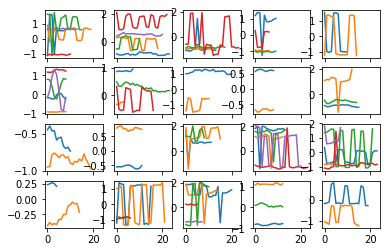

it		avg		std		max		time
1		-0.5432		0.098		-0.344012	12.7526
2		-0.4841		0.104		-0.342174	11.5742
3		-0.4375		0.075		-0.320223	13.0538
4		-0.4192		0.074		-0.320223	16.7797
5		-0.3343		0.044		-0.279414	18.3125
6		-0.314		0.046		-0.271759	12.4663
7		-0.2678		0.04		-0.211317	18.9902
8		-0.224		0.033		-0.195318	15.2336
9		-0.2141		0.028		-0.182548	19.2885
10		-0.1931		0.013		-0.175544	23.9984
11		-0.1918		0.01		-0.175544	27.0821
12		-0.1824		0.01		-0.170102	25.0699
13		-0.1812		0.007		-0.170102	26.9095
14		-0.1917		0.016		-0.170102	28.3657
15		-0.1893		0.02		-0.154678	24.7442
16		-0.1807		0.013		-0.154678	26.6384
17		-0.1782		0.026		-0.150595	27.0226
18		-0.1644		0.018		-0.146678	29.6491
19		-0.1598		0.014		-0.144762	31.9618
20		-0.1514		0.017		-0.123737	30.8452


In [3]:
for x in all_movements:
    set_movements(x)
    # Create files if not created
    tr_gen = TrajectoryGenerator(**tr_gen_options)
    tr_gen.data_generation(**dt_gen_options)
    # Read in the datafiles
    dex = DataExtractor()
    train_df, test_df = dex.train_test_dataframes(**train_test_options)
    print("The train samples length is:{0}".format(len(train_df[0] * train_test_options["split"]*2)))
    print("The test samples length is:{0}\n".format(len(test_df[0] * train_test_options["split"]*2)))
    dex.define_csv(**df_csvs_options)

    x_train, y_train, x_test, y_test = dex.load_datasets()
    print("standardized train and test data\n")
    x_train, x_test = standardize_data(x_train, x_test)
    genetic_extractor = GeneticExtractor(**genetic_options)
    print_genetic_param(genetic_extractor)
    gen_ext = genetic_extractor.fit(x_train, y_train)
#     distances_train = genetic_extractor.transform(x_train)
#     distances_test = genetic_extractor.transform(x_test)
#     lr = LogisticRegression()
#     print(distances_train.shape)
#     lr.fit(distances_train, y_train)
#     import pickle
    from sklearn.externals import joblib
    filename = x["first_movement"][0]
    with open(filename+".pkl", 'wb') as pickle_file:
        joblib.dump(gen_ext, pickle_file)
        pickle_file.close()
    